# Content 
* Basics of least squares
* Linear in parameter and linear in expanatory variables
* Brute force search for optimal parameter
* Optimization using gradient descent
* Using scipy optimizer
* Feature engineering
* Direct method
* Regularization
* Non-linear in parameter space

## Basics of least squares

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "monospace",
    "font.monospace": 'Computer Modern Typewriter'
})
filename="./data/tab1001.dat"
data = pd.read_fwf(filename)
data.head()

,run,Order,x0,x1,y
0,1,3,0.34,0.73,5.75
1,2,6,0.34,0.73,4.79
2,3,1,0.58,0.69,5.44
3,4,4,1.26,0.97,9.09
4,5,2,1.26,0.97,8.59


In [43]:
dict={'run':'Observed run number',
      'Order': 'Order in which exeriments were performed',
      'x0': 'Concentraton of monomers, x0',
      'x1':'Concentration of Dimmer X1',
      'y': 'Initial rate of formatio of impurity y'}
data.rename(columns=dict,inplace=True)
data.head()

,Observed run number,Order in which exeriments were performed,"Concentraton of monomers, x0",Concentration of Dimmer X1,Initial rate of formatio of impurity y
0,1,3,0.34,0.73,5.75
1,2,6,0.34,0.73,4.79
2,3,1,0.58,0.69,5.44
3,4,4,1.26,0.97,9.09
4,5,2,1.26,0.97,8.59


The table shows a small illustrative set of data from an experiment to determine how the initial rate of formation of an undesirable impurity $y$ depended on two factors

* the concentration $x_0$ of monomer
* the concentration of dimmer $x_1$

The mean rate of formation $y$ was zero when both components $x_0$ and $x_1$ were zero and over the relevant rances of $x_0$ and $x_1$ the relationship was expected to be approximated by 

$$y=\theta_0 x_0 + \theta_1 x_1+ \epsilon $$

Now consider the equation for the sum of squares of the discrepencies, between the data values of fhte values calculated from the model 

$$J(\theta)=\sum(y-\theta_0 x_0 - \theta_1 x_1)^2$$

You will see that for any particular set of trial values of the parameters $\theta_0$ and $\theta_1$ you could calculate $J(\theta)$. 

## Brute force approach to finding the optimal parameters

TASK: Find the values of $\theta_0$ and $\theta_1$ that minimize the mean squared error

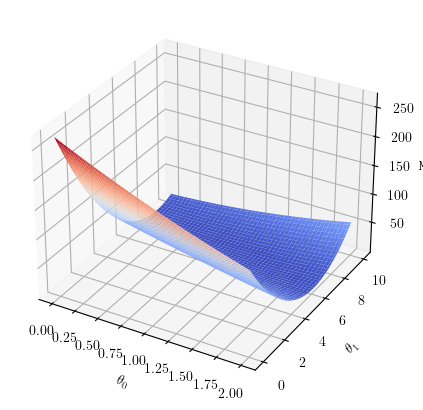

Minimum value of the cost function is  1.3338298642995619


In [44]:
def mean_squared_error(theta0, theta1, x0,x1, y):
    m = len(y)
    J = 0.0
    for i in range(m):
        J += (y[i] - theta0*x0[i] - theta1*x1[i])**2
    return J 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x0=data['Concentraton of monomers, x0'].values
x1=data['Concentration of Dimmer X1'].values
y=data['Initial rate of formatio of impurity y'].values

# Define a range of values for theta0 and theta1
theta0_values = np.linspace(0, 2, 100)
theta1_values = np.linspace(0, 10, 100)

# Create a mesh grid from theta0 and theta1 values
theta0_grid, theta1_grid = np.meshgrid(theta0_values, theta1_values)

# Calculate the MSE cost function for each combination of theta0 and theta1
z = mean_squared_error(theta0_grid, theta1_grid, x0,x1, y)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the MSE cost function
ax.plot_surface(theta0_grid, theta1_grid, z, cmap='coolwarm')

# Add labels to the plot
ax.set_xlabel(r'$\theta_{0}$')
ax.set_ylabel(r'$\theta_{1}$')
ax.set_zlabel('MSE')
#plt.savefig("gridsearch.pdf", bbox_inches='tight')
# Show the plot
plt.show()
print("Minimum value of the cost function is ", np.min(z))

What did you learn form the above excercise ?

## Optimization using gradient descent

### Batch Gradient Descent
Minimize the loss function using gradient descent.

<img src='images/gd.jpg'>

### Gradient descent in single parameters

TASK: Test the effect of initial guess and learning rates

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


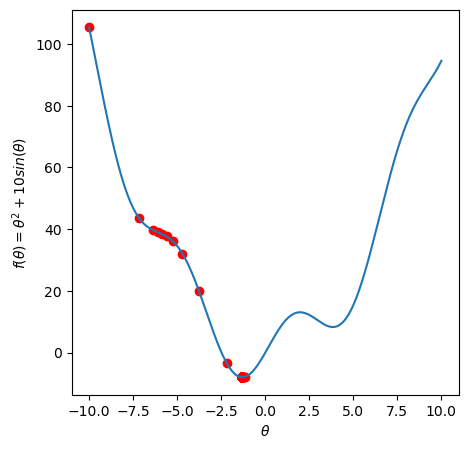

In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "monospace",
    "font.monospace": 'Computer Modern Typewriter'
})

# Define the function to minimize
def f(theta):
    return theta**2 + 10*np.sin(theta)

# Define the derivative of the function
def df(theta):
    return 2*theta + 10*np.cos(theta)

# Set the initial point and learning rate
theta0 = -10
learning_rate = 0.1

# Perform gradient descent
x_list = [theta0]
for i in range(1000):
    x_list.append(x_list[-1] - learning_rate*df(x_list[-1]))

# Plot the function and the path of gradient descent
theta = np.linspace(-10, 10, 1000)
plt.plot(theta, f(theta))
plt.scatter(x_list, f(np.array(x_list)), color='r')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)=\theta^{2}+10sin(\theta)$')
#plt.savefig('x2sinxsuccessful.pdf',bbox_inches='tight')
plt.show()


Write down your conclusion from the above task ?

### Gradient descent in two parameters

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


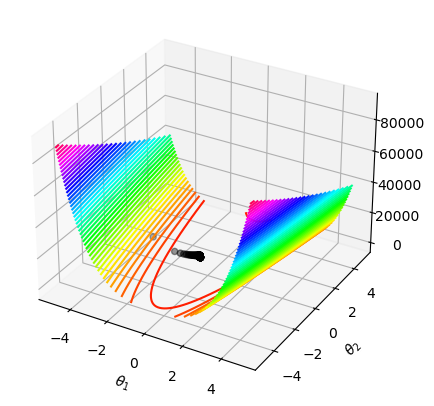

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "monospace",
    "font.monospace": 'Computer Modern Typewriter'
})

# Define the quadric function to minimize
def f(theta1, theta2):
    return (1-theta1)**2 + 100*(theta2-theta1**2)**2

# Define the partial derivative of the function wrt x and y
def df_dx(theta1, theta2):
    return 2*(200*theta1**3 - 200*theta1*theta2 + theta1 - 1)

def df_dy(theta1, theta2):
    return 200*(theta2-theta1**2)

# Set the initial point and learning rate
theta10 = -3
theta20 = 0
learning_rate = 0.0001

# Perform gradient descent
x_list = [theta10]
y_list = [theta20]
for i in range(1000):
    x_new = x_list[-1] - learning_rate*df_dx(x_list[-1], y_list[-1])
    y_new = y_list[-1] - learning_rate*df_dy(x_list[-1], y_list[-1])
    x_list.append(x_new)
    y_list.append(y_new)

# Plot the function and the path of gradient descent
theta1 = np.linspace(-5, 5, 100)
theta2 = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(theta1, theta2)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='hsv')
ax.scatter(x_list, y_list, f(np.array(x_list),np.array(y_list)), color='black')
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
#plt.savefig('2dfunctiongradientdescent.pdf',bbox_inches='tight')
plt.show()

## Stochastic vs Batch gradient descent

<img src='./images/stochasticGD.png' width=500>

TASK: Implement and compare BGD and SGD in terms of memory and compute time. WHat is the take away ?

### Best fit line using least squares

Task: Plot the cost function in 3D

Task: Introduce some outliers and see how sensitive the fitting it

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


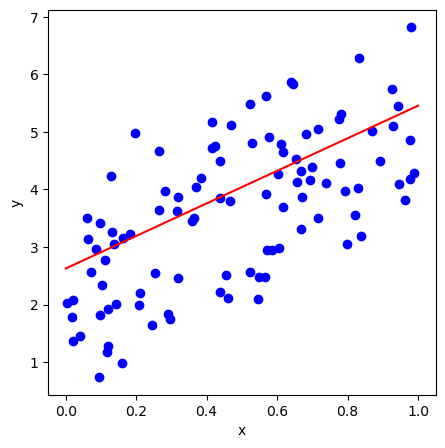

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


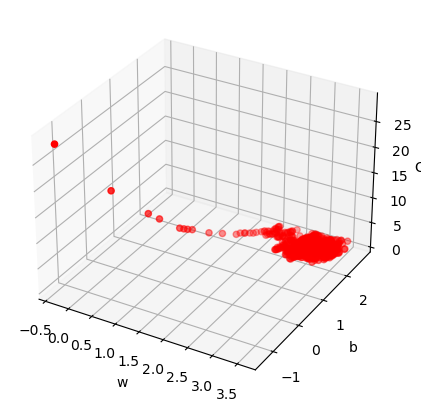

In [47]:
from mpl_toolkits import mplot3d

# Generate some random data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.randn(100, 1)

# Initialize the parameters
w = np.random.randn(1)
b = np.random.randn(1)

# Define the learning rate
learning_rate = 0.1

# Define the number of iterations
num_iterations = 1000

# Initialize the lists to store the values of w and b at each iteration
w_list = [w[0]]
b_list = [b[0]]
cost_list = [np.mean((y - (w*x + b))**2)]

# Perform stochastic gradient descent
for i in range(num_iterations):
    # Select a random data point
    rnd_ind = np.random.randint(0, x.shape[0])
    x_i = x[rnd_ind]
    y_i = y[rnd_ind]

    # Compute the gradient
    y_pred = w * x_i + b
    grad_w = (y_pred - y_i) * x_i
    grad_b = y_pred - y_i

    # Update the parameters
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b

    # Store the values of w and b
    w_list.append(w[0])
    b_list.append(b[0])
    cost_list.append(np.mean((y - (w*x + b))**2))

# Plot the data and the line
plt.scatter(x, y, c='b')
plt.xlabel('x')
plt.ylabel('y')

x_line = np.linspace(0, 1, 2)
y_line = w * x_line + b
plt.plot(x_line, y_line, 'r')
#plt.savefig('linearleastsquaredataline.pdf',bbox_inches='tight')
plt.show()

# Plot the history of the optimization in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(w_list, b_list, cost_list, c='r')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
#plt.savefig('linearleastsquareparamtrajectory.pdf',bbox_inches='tight')
plt.show()

What do conclude about the sensitivity of least squares to outliers ?

## Models non-linear in feature space

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


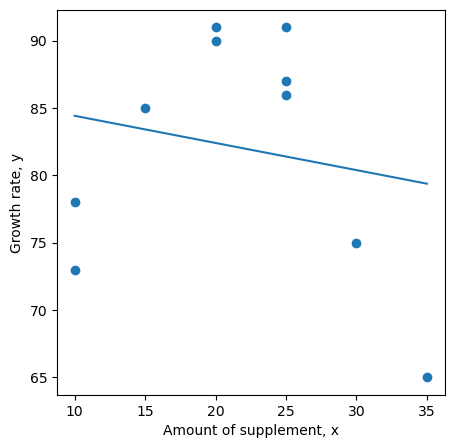

In [48]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
filename='data/tab1007.dat'
data = pd.read_fwf(filename)
data.head()
x=data['x'].values
y=data['y'].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

regr=LinearRegression()
regr.fit(x,y)

plt.scatter(x,y)
plt.plot(x,regr.predict(x))
plt.xlabel('Amount of supplement, x')
plt.ylabel('Growth rate, y')
#plt.savefig('linear2quadraticfit.pdf',bbox_inches='tight')
plt.show()

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


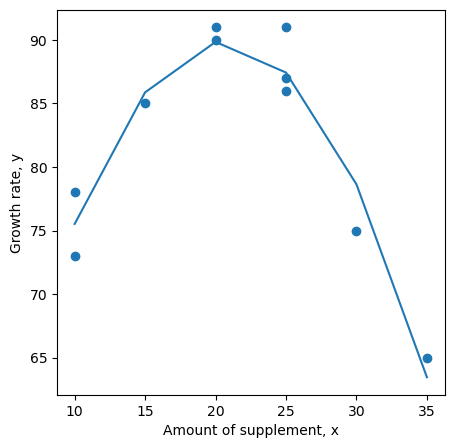

In [49]:
xfeatured=np.stack([x.reshape(-1),x.reshape(-1)**2],axis=1)
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(xfeatured,y)
plt.scatter(x,y)
plt.plot(x,regr.predict(xfeatured))
plt.xlabel('Amount of supplement, x')
plt.ylabel('Growth rate, y')
plt.savefig('featuredEngineeredfit.pdf',bbox_inches='tight')
plt.show()

## Models non-linear in feature and parameter space

All the models so far discussed in this lecture have been linear in the parameters.  The following example will show how the method of LS can also be used to fit models that are nonlinear in the parameters.

Biochemical oxygen demand (BOD) is used as a measure of the pollution produced by domestic and industrial wastes. In this test a small portion of the waste is mixed with pure water in a sealed bottle and incubated usually for 5 days at a fixed temperature. The reduction of the dissolved oxygen in the water allows the calculation of the BOD occurring during the incubation period. The data given in table below were obtained from six separate bottles tested over a range of incubation days. Physical considerations suggest that the exponential model 


$$y=\theta_1 (1-e^{-\theta_2 x})$$

should describe the phenomena. The parameters $\theta_2$ would then be the overall rate constant and $\theta_1$ would be the ultimate BOD

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename='data/tab1019.dat'
data=pd.read_fwf(filename)
x=data['x'].values
y=data['y'].values
data.head()

,u,y,x
0,1,109,1
1,2,149,2
2,3,149,3
3,4,191,5
4,5,213,7


$u$ is observation number, $y$ is BOD ($mg/L$) and $x$ is incubation (days) 

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


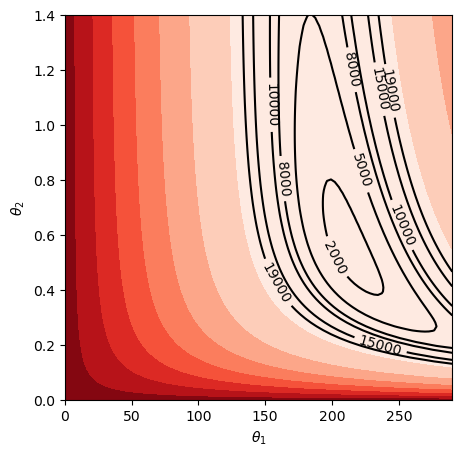

In [51]:
def cost(theta1,theta2,x,y):
    n=len(x)
    J=0.0
    for i in range(n):
        J=J+(y[i]-theta1*(1-np.exp(-theta2*x[i])))**2
    return J

theta1_values = np.linspace(0, 290, 100)
theta2_values = np.linspace(0, 1.4, 100)
cost_landscape=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        cost_landscape[i,j]=cost(theta1_values[j],theta2_values[i],x,y)
Theta1,Theta2=np.meshgrid(theta1_values,theta2_values)
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 5 # sets plot size

fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([1168,2000,5000,8000,10000,15000,19000])

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(Theta1,Theta2,cost_landscape, len(levels), cmap=cm.Reds)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(Theta1,Theta2,cost_landscape, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
ax.set_xlabel(r'$\theta_{1}$')
_ = ax.set_ylabel(r'$\theta_{2}$')
plt.savefig('costlandscapeBOD.pdf',bbox_inches='tight')

## Optimization using scipy optimizer

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


Minimized Mean squared error =  1168.0088765555713
Optimal parameters theta1 = 213.80941166510075 , theta2= 0.5472374776689821


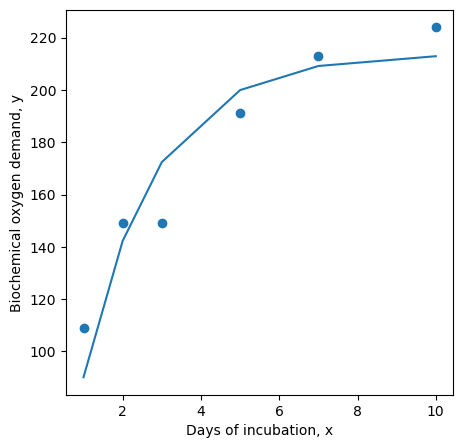

In [52]:
def calc_cost(param,data):
    x=data[:,0]
    y=data[:,1]
    theta1,theta2=param
    n=len(x)
    J=0.0
    for i in range(n):
        J=J+(y[i]-theta1*(1-np.exp(-theta2*x[i])))**2
    return J
from scipy.optimize import minimize

# Example data
data = np.stack([x,y],axis=1)
# Initialize the shape parameters
params = [10, 10]
result = minimize(calc_cost, params, args=(data,),method='L-BFGS-B')
print("Minimized Mean squared error = ",result.fun)
print("Optimal parameters theta1 =",result.x[0], ", theta2=" ,result.x[1])

theta1 = 213.80941166510075
theta2= 0.5472374776689821
for i in range(len(x)):
    ypred=theta1*(1-np.exp(-theta2*x))
plt.scatter(x,y)
plt.plot(x,ypred)
plt.xlabel('Days of incubation, x')
plt.ylabel('Biochemical oxygen demand, y')
#plt.savefig('BODvsIncubation.pdf',bbox_inches='tight')
plt.show()

TASK: If suitable assumptions are made the following model can be derived from chemical kinetic theory for a conservative reaction with $y$ the yield of intermediate product, $x$ the reaction time, and $\theta_1$ and $\theta_2$ the rate constants to be estimated from the experimental data

$$y=\frac{\theta_1}{\theta_1 -\theta_2}(e^{-\theta_2 t}-e^{-\theta_1 t})$$

A chemist wants to obtain the most precise estimate possible of $\theta_1$ and $\theta_2$ from the following data

In [53]:
import numpy as np
import pandas as pd
t=np.array([10,20,30,40,50,60])
y=np.array([0.20,0.52,0.69,0.64,0.57,0.48])

The reaction is this type reactant $\longrightarrow$ product $\longrightarrow$ by-product  $\theta_1$ is the rate constant of the first reaction and $\theta_2$ of the second reaction. Obtain the least squares estimates for $\theta_1$ and $\theta_2$

## Geometry of least squares

In [54]:
filename='data/tab1001.dat'
data = pd.read_fwf(filename)
x0=data['x0'].values
x1=data['x1'].values
x=np.stack([x0,x1],axis=1)
y=data['y'].values
regr.fit(x,y)
yhat=regr.predict(x)
residual=y-yhat
data['yhat']=yhat
data['y-yhat']=residual
ST=np.sum(y**2)
SM=np.sum(yhat**2)
SR=np.sum((y-yhat)**2)

print("ST=", ST)
print("SM=", SM)
print("SR=", SR)
print(ST-SM-SR)

ST= 267.92449999999997
SM= 267.31885753716585
SR= 0.6056424628341416
-2.964295475749168e-14


From above you can see that 
$$\sum y^2=\sum \hat{y}^2+\sum(y-\hat{y})^2$$
<img src='images/geometryLS.png' width=500>

## Normal equation

In matrix notation the model at the $m$ distinct sets of conditions can be written as
 
$$\bm{y}=\textbf{X}\bm{\theta}$$

where $\bm{y}$ is the $m \times 1$ vector of expected values for the response , $\textbf{X}$ is the $m \times n$ matrix of independent variables (regressors), and $\bm{\theta}$ is the $n \times 1$ vector of parameters.

Since $\bm{x}_1, \bm{x}_2, \bm{x}_3\cdots,\bm{x}_n$ are the columns of $\textbf{X}$, the normal equations

$$\bm{x}_1^{\text{T}}(\textbf{y}-\hat{\textbf{y}})=0, \bm{x}_2^{\text{T}}(\textbf{y}-\hat{\textbf{y}})=0,\dots,\bm{x}_n^{\text{T}}(\textbf{y}-\hat{\textbf{y}})=0$$

can be written as $\textbf{X}^{\text{T}}(\textbf{y}-\hat{\textbf{y}})=0$ where $\text{T}$ stands for transpose.    

Upon substitution of $\hat{\bm{y}}=\textbf{X}$ $\bm{\hat{\theta}}$ 

$$\textbf{X}^{\text{T}}(\textbf{y}-\textbf{X}\bm{\hat{\theta}})=0$$

$$\textbf{X}^{\text{T}}\textbf{X}\bm{\hat{\theta}}=\textbf{X}^{\text{T}}\textbf{y}$$

if we suppose that the columns of $\textbf{X}$ are linearly independent, $\textbf{X}^\text{T}\textbf{X}$ has an inverse and 

$$\bm{\hat{\theta}}=(\textbf{X}^{\text{T}} \textbf{X})^{-1}\textbf{X}^{\text{T}}\textbf{y}$$   



findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


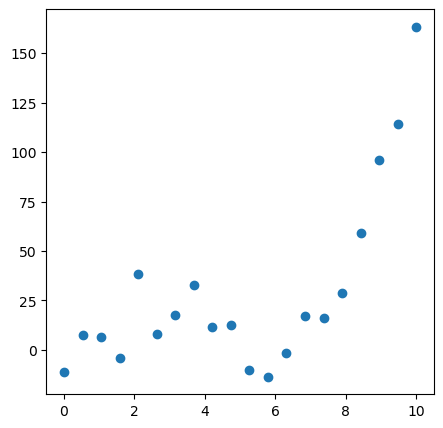

In [55]:
import numpy as np
import matplotlib.pyplot as plt
# Generate sample data
x = np.linspace(0,10,20)
y = (x-5)**3 +3*(x-6)**2
noise=np.random.normal(0,8,y.shape)
y=y+noise
plt.scatter(x,y)
plt.show()

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


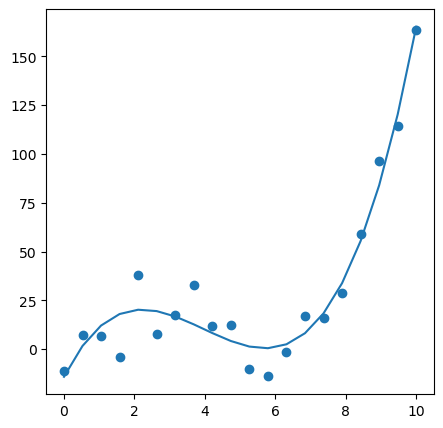

In [56]:
# Engineering features
xreshaped=x.reshape(-1)
xfeatured=np.stack([xreshaped**0,xreshaped**1,xreshaped**2,xreshaped**3],axis=1)
#theta=np.linalg.inv(np.matmul(xfeatured.T,X))
theta = np.linalg.inv(xfeatured.T.dot(xfeatured)).dot(xfeatured.T).dot(y)
ypred=xfeatured.dot(theta)
plt.scatter(x,y)
plt.plot(x,ypred)
plt.show()

Making model more complex

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


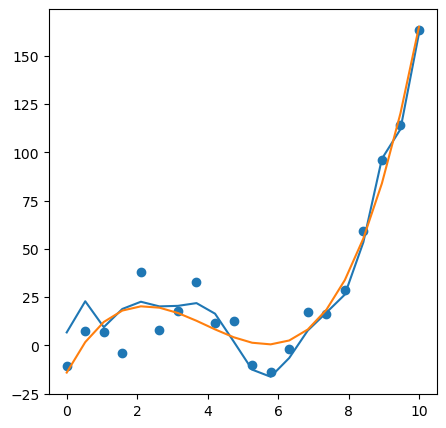

In [57]:
xcomplex=np.stack([xreshaped**0,xreshaped**1,xreshaped**2,xreshaped**3,xreshaped**4,xreshaped**5,xreshaped**6,xreshaped**7,xreshaped**8,xreshaped**9,xreshaped**10,xreshaped**11],axis=1)
theta = np.linalg.inv(xcomplex.T.dot(xcomplex)).dot(xcomplex.T).dot(y)
ypred8=xcomplex.dot(theta)
plt.scatter(x,y)
plt.plot(x,ypred8)
plt.plot(x,ypred)
plt.show()

## Regularization

<img src='./images/L1L2regularization.jpg' width="500">

L-2 regularization


$$J(\theta)=\sum_{i=1}^{m}(y_i-\theta_o -\sum_{j=1}^{p} \theta_{j}x_{ij})^2+\lambda \sum_{j=1}^n \theta_j^2$$

findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter


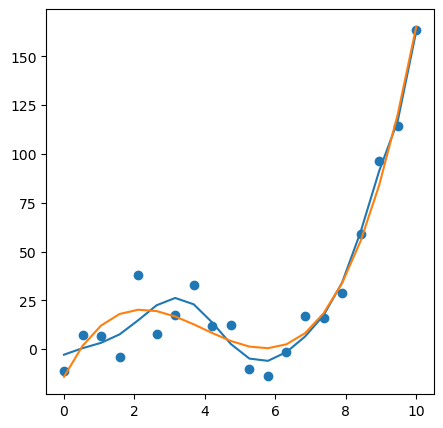

array([-2.80940327e+00,  6.68660490e+00,  6.32026502e-01, -3.01193117e+00,
       -1.09306805e+00,  5.03114807e+00, -3.34127549e+00,  1.02347398e+00,
       -1.72202207e-01,  1.64525579e-02, -8.39641345e-04,  1.78147542e-05])

In [58]:
lambd=0.5
xcomplex=np.stack([xreshaped**0,xreshaped**1,xreshaped**2,xreshaped**3,xreshaped**4,xreshaped**5,xreshaped**6,xreshaped**7,xreshaped**8,xreshaped**9,xreshaped**10,xreshaped**11],axis=1)
#theta = np.linalg.inv(xcomplex.T.dot(xcomplex)).dot(xcomplex.T).dot(y)+lambda_*np.eye(X.shape[1])).dot(X.T).dot(y)
theta = np.linalg.inv(xcomplex.T.dot(xcomplex) + lambd * np.eye(xcomplex.shape[1])).dot(xcomplex.T).dot(y)
ypred8=xcomplex.dot(theta)
plt.scatter(x,y)
plt.plot(x,ypred8)
plt.plot(x,ypred)
plt.show()
#theta = np.linalg.inv(X.T.dot(X) + lambda_*np.eye(X.shape[1])).dot(X.T).dot(y)
theta

L-2 regularization

$$J(\theta)=\sum_{i=1}^{m}(y_i-\theta_o -\sum_{j=1}^{p} \theta_{j}x_{ij})^2+\lambda \sum_{j=1}^n |\theta_j|$$

c:\Users\adil\anaconda3\envs\testing\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+03, tolerance: 4.024e+00
  model = cd_fast.enet_coordinate_descent(
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: Generic family 'monospace' not found because none of the following families were found: Computer Modern Typewriter
findfont: G

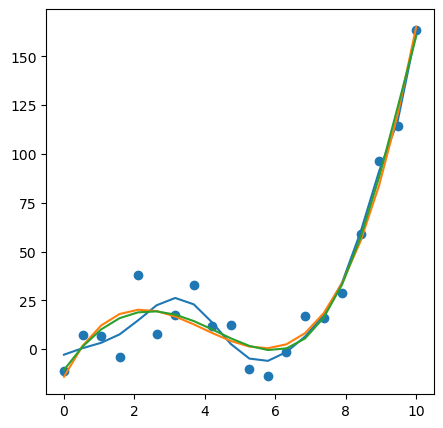

[ 0.00000000e+00  2.57351515e+01 -5.83362030e+00  6.91321035e-02
  2.37093009e-02  1.92710445e-03  1.08477052e-04  3.70493408e-06
 -1.05659902e-07 -3.72562339e-08 -4.88923530e-09 -5.07530469e-10]


In [59]:
import numpy as np
from sklearn.linear_model import Lasso


# Regularization parameter
alpha = 0.1

# L1 regularization
lasso = Lasso(alpha=alpha)
lasso.fit(xcomplex, y)

ypredlasso=lasso.predict(xcomplex)
plt.scatter(x,y)
plt.plot(x,ypred8)
plt.plot(x,ypred)
plt.plot(x,ypredlasso)
plt.show()

# print theta
print(lasso.coef_)

TASK: Plot the thetas for normal equation, L2 regularized and L1 regularized for better comparision

## Weighted least squares
Weighted least squares (WLS) is a variation of least squares in which the residuals (the differences between the observed values and the predicted values) are weighted in order to give more importance to certain observations. This can be useful in situations where some observations are more important or more accurate than others.

The weighted least squares method can be used to solve linear regression problems by minimizing the following cost function:

$$J(\theta) = \frac{1}{2m} * \sum_{i=1}^m(w_{i}(y_{i} - \hat{y_{i}})^2 )$$

where $w_{i}$ is the weight assigned to the $i^{th}$ observation, $y_{i}$ is the observed value, $\hat{y}_{i}$ is the predicted value of the observed value. 

TASK: Write the code for weighted least squares

# CONGRATULATIONS !!!
For successfully completing the notebook